<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Regress%C3%A3o_linear_multivari%C3%A1vel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O exemplo é o mesmo da semana um, mas agora vamos estudar para várias variáveis de entrada, como o numero de quartos, numero de andares e a idade da casa, os arâmetros são definidos na imagem a seguir:
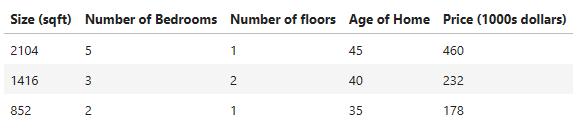

No código isso resulta em:

In [1]:
import numpy as np
import math
import copy

X_treino = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_treino = np.array([460, 232, 178])

In [9]:
X_treino

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

W continua sendo uma matriz, mas agora recebe o número de parâmetros adotados

In [2]:
b_ini = 785.1811367994083
w_ini = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])


In [3]:
print(X_treino[0,:])

[2104    5    1   45]


O modelo de predição continua sendo o mesmo, assim:

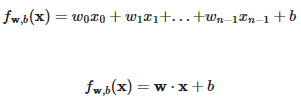

In [4]:
def predicao_elemento(x, w, b):

    y = 0
    for i in range(x.shape[0]):
        y_i = x[i] * w[i]
        y = y + y_i
    y = y + b
    return y
#testando para uma entrada
x_teste = X_treino[0,:]

#predicao para os valores de peso e vies tomado
f_w = predicao_elemento(x_teste, w_ini, b_ini)
print(f"f_wb shape {f_w.shape}, predição: {f_w}")

f_wb shape (), predição: 459.9999976194083


ao inves disso podemos usar a multiplicação por vetor, exibida no código

In [5]:
def predicao(x, w, b):

    y = np.dot(x, w) + b
    return y
#teste
x_teste = X_treino[0,:]

#predicao
f_w = predicao(x_teste,w_ini, b_ini)
print(f"f_wb shape {f_w.shape}, predição: {f_w}")

f_wb shape (), predição: 459.9999976194083


De forma similar ao de uma entrada, agora vamos calcular o erro por:

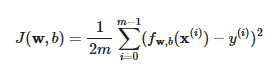

In [6]:
def erro_medio_quad(x, y, w, b):


    erro = 0.0
    for i in range(x.shape[0]):
        f_w_i = np.dot(x[i], w) + b
        erro = erro + (f_w_i - y[i])**2
    erro = erro / (2 * x.shape[0])
    return erro
# Compute and display cost using our pre-chosen optimal parameters.
erro = erro_medio_quad(X_treino, y_treino, w_ini, b_ini)
print(f'Erro com o peso w adotado: {erro}')

Erro com o peso w adotado: 1.5578904428966628e-12


O gradiente descendente aqui é:

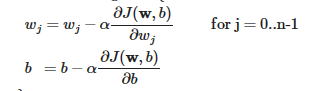

Sendo o gradiente dado por:

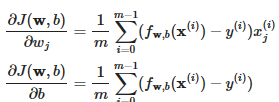

In [7]:
#Em cóodigo, é bem similar ao método anterior, começando pelo gradiente

def gradiente(x, y, w, b):

    m,n = x.shape           #(numero exemplos, numero de parametros)
    dj_dw = np.zeros((n,))  #numero de pesos
    dj_db = 0.0             #numero de peso, somente no fim

    for i in range(m):
        erro = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + erro * x[i, j]
        dj_db = dj_db + erro
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = gradiente(X_treino, y_treino, w_ini, b_ini)
print(f'dj_db inicial para w,b adotado: {tmp_dj_db}')
print(f'dj_dw inicial para w,b adotado: \n {tmp_dj_dw}')

dj_db inicial para w,b adotado: -1.6739251501955248e-06
dj_dw inicial para w,b adotado: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


Agora, podemos partir para o código do gradiente descendente

In [8]:
def gradiente_descendente(x, y, w_ini, b_ini, alpha, num_interacoes, emq, gradiente):

    #Uma lista pra salvar o histórico do erro
    J_history = []
    w = copy.deepcopy(w_ini)  #copiando os valores do peso inicial
    b = b_ini
    w = w_ini

    for i in range(num_interacoes):

        #Gradiente, atualizando os seus parâmetros
        dj_db,dj_dw = gradiente(x, y, w, b)

        #Atualizando o peso e o vies
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        #Anotando os valores para J
        if i<100000:
            J_history.append(emq(x, y, w, b))

        # printando
        if i% math.ceil(num_interacoes / 10) == 0:
            print(f"Interação {i:4d}: Erro {J_history[-1]:8.2f}   ")

    return w, b, J_history

#Iniciando os pesos e vieses como 0
w_inic = np.zeros_like(w_ini)
b_inic = 0.

interacoes = 1000
taxa_apr = 5.0e-7
#Execução do grandiente descendente para atualizar os pesos
w_final, b_final, J_hist = gradiente_descendente(X_treino, y_treino, w_inic, b_inic, taxa_apr, interacoes, erro_medio_quad, gradiente)
print(f"b,w encontrado pelo gradiente descendente: {b_final:0.2f},{w_final} ")


for i in range(len(X_treino)):
    print(f"predição: {np.dot(X_treino[i], w_final) + b_final:0.2f}, valor real: {y_treino[i]}")

Interação    0: Erro  2529.46   
Interação  100: Erro   695.99   
Interação  200: Erro   694.92   
Interação  300: Erro   693.86   
Interação  400: Erro   692.81   
Interação  500: Erro   691.77   
Interação  600: Erro   690.73   
Interação  700: Erro   689.71   
Interação  800: Erro   688.70   
Interação  900: Erro   687.69   
b,w encontrado pelo gradiente descendente: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
predição: 426.19, valor real: 460
predição: 286.17, valor real: 232
predição: 171.47, valor real: 178
